Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

Goal: 
Create multiclass classification model using custome convolutional neural network in tensorflow.

Data Summary:

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:

1. Actinic keratosis
2. Basal cell carcinoma
3. Dermatofibroma
4. Melanoma
5. Nevus
6. Pigmented benign keratosis
7. Seborrheic keratosis
8. Squamous cell carcinoma
9. Vascular lesion 




### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [64]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, InputLayer
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defeining the path for train and test images
root_path = '/content/gdrive/MyDrive/CNN/Skin_Cancer_Dataset_N'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
## Write your test dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

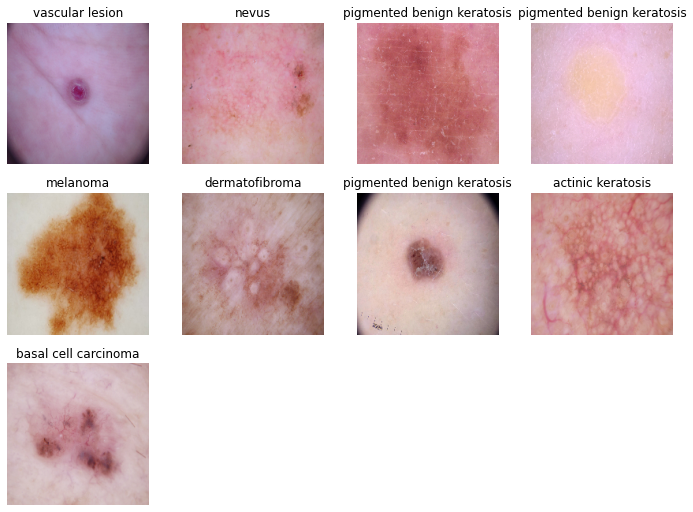

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3))
]


In [17]:


model=Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180,3))])

model.add(Conv2D(16, 3, activation='relu',padding='same', input_shape = (180, 180, 32)))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation='relu',padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(9, activation='softmax'))

model.summary()




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_2 (ModuleWra  (None, 180, 180, 16)     448       
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 90, 90, 16)       0         
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 90, 90, 32)       4640      
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 45, 45, 32)       0         
 pper)                                                

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [19]:
### Todo, choose an appropirate optimiser and loss function

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [20]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_2 (ModuleWra  (None, 180, 180, 16)     448       
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 90, 90, 16)       0         
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 90, 90, 32)       4640      
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 45, 45, 32)       0         
 pper)                                                

### Train the model

In [21]:
epochs = 20
history = model.fit(
  train_ds,
  batch_size = batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 78s 1s/step - loss: 2.1677 - accuracy: 0.2372 - val_loss: 1.8687 - val_accuracy: 0.3043
Epoch 2/20
56/56 [==============================] - 3s 60ms/step - loss: 1.6924 - accuracy: 0.3951 - val_loss: 1.5516 - val_accuracy: 0.5011
Epoch 3/20
56/56 [==============================] - 3s 60ms/step - loss: 1.4925 - accuracy: 0.4771 - val_loss: 1.5264 - val_accuracy: 0.5011
Epoch 4/20
56/56 [==============================] - 3s 60ms/step - loss: 1.3742 - accuracy: 0.5195 - val_loss: 1.3683 - val_accuracy: 0.5369
Epoch 5/20
56/56 [==============================] - 3s 60ms/step - loss: 1.2783 - accuracy: 0.5485 - val_loss: 1.3885 - val_accuracy: 0.5213
Epoch 6/20
56/56 [==============================] - 3s 60ms/step - loss: 1.2180 - accuracy: 0.5692 - val_loss: 1.3335 - val_accuracy: 0.5391
Epoch 7/20
56/56 [==============================] - 3s 60ms/step - loss: 1.1309 - accuracy: 0.5943 - val_loss: 1.5658 - val_accuracy: 0.4944
Epoch 8/20
56/

### Visualizing training results

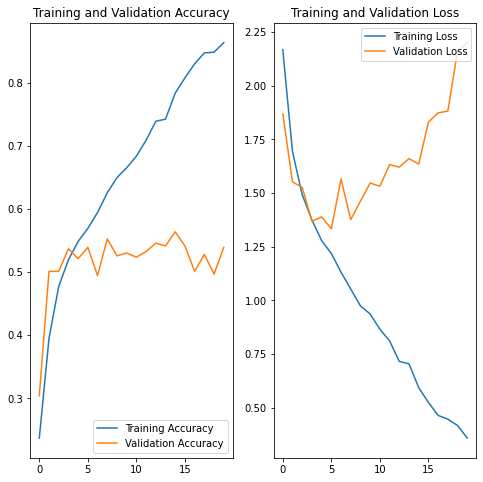

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit.

Result:

Train Accuracy - 0.88

Train Loss - 0.31

Validation Accuracy - 0.53

Validation Loss - 2.20

### Write your findings here

In [23]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_val, accuracy_val = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_val)
print("Loss: ",loss)
print("Validation Loss", loss_val)

14/14 [==============================] - 0s 23ms/step - loss: 2.2006 - accuracy: 0.5391
Accuracy:  0.8811383843421936
Validation Accuracy:  0.5391498804092407
Loss:  0.31372329592704773
Validation Loss 2.200582981109619



Based on above information, it clearly indicates model is overfitting. Hence need to adopt argumentation starategy


In [27]:
image_aug = keras.Sequential([layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(180,180,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')])

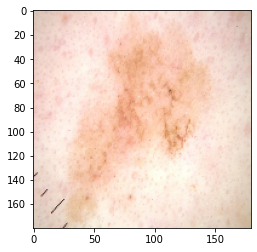

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_aug1=ImageDataGenerator(rescale=1./255,
                   horizontal_flip=True,
                   zoom_range=0.2)
image_batch,label_batch=next(iter(train_ds))
temp=image_batch[0].numpy()
plt.imshow(temp.astype('uint8'))

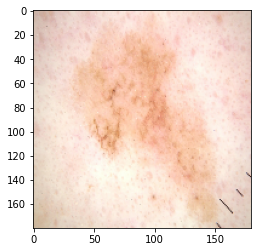

In [29]:
#visualize how your augmentation strategy works for one instance of training image.
plt.imshow(image_aug1.apply_transform(temp,transform_parameters={'flip_horizontal':True}).astype('uint8'))

### Todo:
### Create the model, compile and train the model


In [30]:
# Create the model
model1=Sequential([image_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model1.add(Conv2D(16, 3, activation='relu',padding='same',input_shape = (180, 180, 32)))
model1.add(MaxPooling2D())

model1.add(Conv2D(32, 3, activation='relu',padding='same'))
model1.add(MaxPooling2D())
model1.add(Conv2D(64, 3, activation='relu',padding='same'))
model1.add(MaxPooling2D())
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(9, activation='softmax'))


### Compiling the model

In [31]:
# Compile the model
model1.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [32]:
# View the summary of all layers
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_11 (ModuleWr  (None, 180, 180, 16)     448       
 apper)                                                          
                                                                 
 module_wrapper_12 (ModuleWr  (None, 90, 90, 16)       0         
 apper)                                                          
                                                                 
 module_wrapper_13 (ModuleWr  (None, 90, 90, 32)       4640      
 apper)                                                          
                                                      

In [ ]:
# Set the learning rate
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduc = ReduceLROnPlateau(monitor='val_accuracy',
                                        patience = 3,
                                        verbose = 1,
                                        factor = 0.5,
                                        min_lr = 0.00001)

### Training the model

In [33]:
# Training the model
epochs = 20
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 6s 73ms/step - loss: 2.0727 - accuracy: 0.2294 - val_loss: 1.9744 - val_accuracy: 0.2327
Epoch 2/20
56/56 [==============================] - 4s 71ms/step - loss: 1.7727 - accuracy: 0.3778 - val_loss: 1.5888 - val_accuracy: 0.4720
Epoch 3/20
56/56 [==============================] - 4s 71ms/step - loss: 1.5603 - accuracy: 0.4542 - val_loss: 1.4782 - val_accuracy: 0.5190
Epoch 4/20
56/56 [==============================] - 4s 71ms/step - loss: 1.4605 - accuracy: 0.4972 - val_loss: 1.4250 - val_accuracy: 0.5213
Epoch 5/20
56/56 [==============================] - 4s 70ms/step - loss: 1.3924 - accuracy: 0.5151 - val_loss: 1.4319 - val_accuracy: 0.5302
Epoch 6/20
56/56 [==============================] - 4s 71ms/step - loss: 1.3544 - accuracy: 0.5179 - val_loss: 1.3849 - val_accuracy: 0.5257
Epoch 7/20
56/56 [==============================] - 4s 71ms/step - loss: 1.3244 - accuracy: 0.5329 - val_loss: 1.3722 - val_accuracy: 0.5391
Epoch 8/20
56

### Visualizing the results

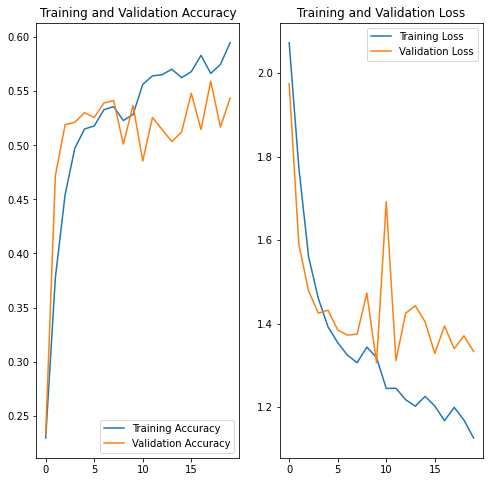

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Train Acuracy: 0.59
Validatin Acuracy: 0.54
Loss: 1.12

Findings:

From the above results we can see that model is underfitting. Eventhough Train and validation accuracy is almost near but the value is less we got only 54% which is not good accuracy.

Proposed Solution:

We can check for class imbalance and rectify using Augmentor package, can do batch normalization, dropout in layers.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [39]:
for i in class_names:
  print(i,": ",len(list(data_dir_train.glob('{}/*.jpg'.format(i)))))

actinic keratosis :  114
basal cell carcinoma :  376
dermatofibroma :  95
melanoma :  438
nevus :  357
pigmented benign keratosis :  462
seborrheic keratosis :  77
squamous cell carcinoma :  181
vascular lesion :  139


<BarContainer object of 9 artists>

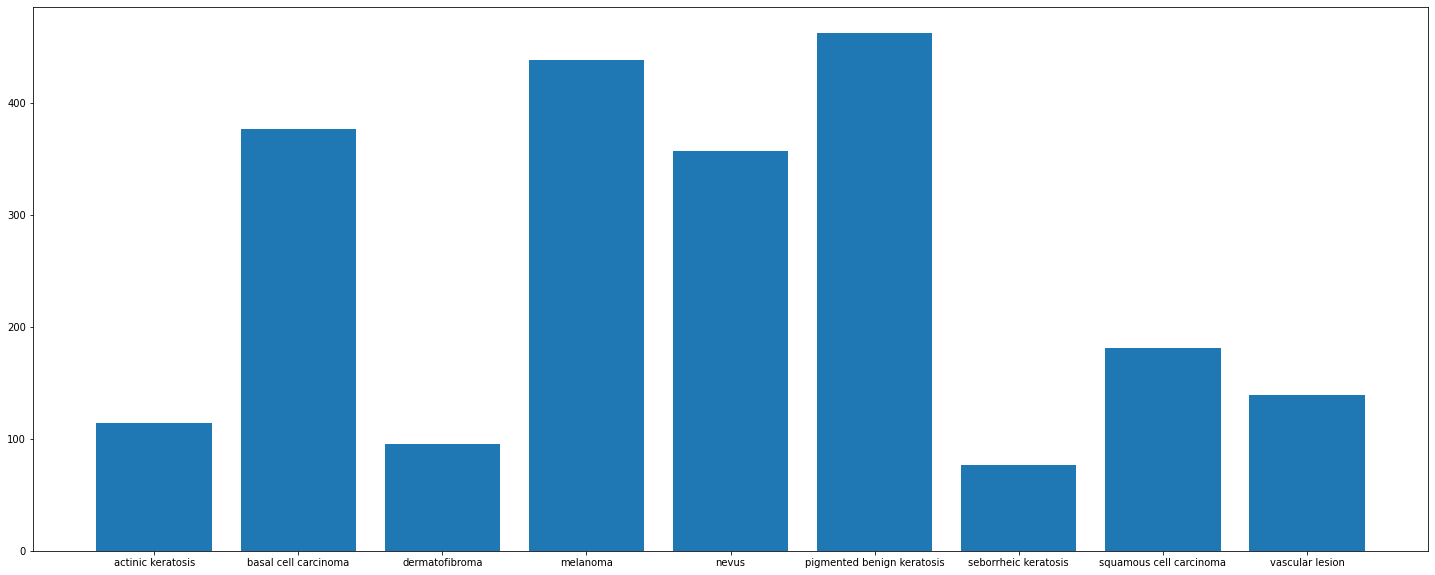

In [40]:
# Visualize class imbalance through chart
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)









#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
'seborrheic keratosis' has lowest number of image with 77

#### - Which classes dominate the data in terms proportionate number of samples?
Pigmented benign keratosis dominates the data of count more than 100 in training

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [41]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [43]:

import Augmentor
for i in class_names:
  augmnt_pipeline = Augmentor.Pipeline(str(data_dir_train) + '/'+ i)
  augmnt_pipeline.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
  augmnt_pipeline.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin_Cancer_Dataset_N/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F28C3CA9A50>: 100%|██████████| 500/500 [00:21<00:00, 23.26 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin_Cancer_Dataset_N/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F28C3CF9990>: 100%|██████████| 500/500 [00:20<00:00, 24.23 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin_Cancer_Dataset_N/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F28C3CCE610>: 100%|██████████| 500/500 [00:21<00:00, 22.74 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin_Cancer_Dataset_N/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1242x1284 at 0x7F28C3D16B90>: 100%|██████████| 500/500 [01:51<00:00,  4.50 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin_Cancer_Dataset_N/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F28BF56A150>: 100%|██████████| 500/500 [01:26<00:00,  5.77 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin_Cancer_Dataset_N/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F28BF4B35D0>: 100%|██████████| 500/500 [00:21<00:00, 23.45 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin_Cancer_Dataset_N/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F28C4352690>: 100%|██████████| 500/500 [00:48<00:00, 10.36 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin_Cancer_Dataset_N/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F28BF5A1450>: 100%|██████████| 500/500 [00:21<00:00, 23.39 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin_Cancer_Dataset_N/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F28C3CF35D0>: 100%|██████████| 500/500 [00:22<00:00, 22.55 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [44]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [54]:
# checking label
path_list=[]
lesion_list=[]
for i in class_names:
      for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/CNN/Skin_Cancer_Datase...,actinic keratosis
1,/content/gdrive/MyDrive/CNN/Skin_Cancer_Datase...,actinic keratosis
2,/content/gdrive/MyDrive/CNN/Skin_Cancer_Datase...,actinic keratosis
3,/content/gdrive/MyDrive/CNN/Skin_Cancer_Datase...,actinic keratosis
4,/content/gdrive/MyDrive/CNN/Skin_Cancer_Datase...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/CNN/Skin_Cancer_Datase...,vascular lesion
2235,/content/gdrive/MyDrive/CNN/Skin_Cancer_Datase...,vascular lesion
2236,/content/gdrive/MyDrive/CNN/Skin_Cancer_Datase...,vascular lesion
2237,/content/gdrive/MyDrive/CNN/Skin_Cancer_Datase...,vascular lesion


### Lets see the distribution of augmented data after adding new images to the original training data.

In [45]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/CNN/Skin_Cancer_Dataset_N/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010852.jpg_644b99ad-7841-4836-9fbb-e34b63d2b0ff.jpg',
 '/content/gdrive/MyDrive/CNN/Skin_Cancer_Dataset_N/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010979.jpg_12bedf5f-b307-4507-88b4-78afb2cff9e5.jpg',
 '/content/gdrive/MyDrive/CNN/Skin_Cancer_Dataset_N/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010852.jpg_906580c6-9f35-4cf1-828e-0c6b16d7e1b6.jpg',
 '/content/gdrive/MyDrive/CNN/Skin_Cancer_Dataset_N/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010912.jpg_dc6f813e-945b-493e-b083-988ce3697072.jpg',
 '/content/gdrive/MyDrive/CNN/Skin_Cancer_Dataset_N/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011140.jpg_6553b0e8-64fa-43e7-afc3-16f76b5f73bd.jpg',
 '/content/gdrive/MyDrive/CNN/Skin_Cancer_Dataset_N/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

In [56]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [57]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [58]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
nevus                         857
dermatofibroma                595
seborrheic keratosis          577
melanoma                      438
squamous cell carcinoma       420
basal cell carcinoma          376
vascular lesion               139
actinic keratosis             114
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [59]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [60]:
augmented_data_dir =data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  augmented_data_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [61]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  augmented_data_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [105]:
## your code goes here

input_shape = (180,180,3)
lr = 1e-5
init = 'normal'
activ = 'relu'

model = Sequential()

# Increasing the model size by adding another 32 layer
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))
model.add(Conv2D(32, kernel_size= (3,3), activation = 'relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size= (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(9, activation='softmax'))
model.build(input_shape)

model.summary()


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_28 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_331 (ModuleW  (None, 180, 180, 32)     896       
 rapper)                                                         
                                                                 
 batch_normalization_54 (Bat  (None, 180, 180, 32)     128       
 chNormalization)                                                
                                                                 
 module_wrapper_332 (ModuleW  (None, 90, 90, 32)       0         
 rapper)                                                         
                                                                 
 module_wrapper_333 (ModuleW  (None, 88, 88, 64)       18496     
 rapper)                                             

#### **Todo:** Compile your model (Choose optimizer)

In [108]:
#choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

#### **Todo:**  Model Training with 30 epochs

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds ,
  epochs=epochs,
)

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Visualization

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_val2, accuracy_val2 = model.evaluate(valid_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_val2)
print("Loss: ",loss)
print("Validation Loss", loss_val2)

Result:

Train Accuracy - 0.90

Validation Accuracy - 0.78

Train Loss - 0.22

Validation Loss - 0.91

Findings:

From the above result we come to know this model's validation accuracy is increased when compared to previous models. But this model is also overfitting.

Using class rebalance, droupout, batch normalization helps in acheiving the better result than simple model.

Proposed Solution:
Hhyperparameter tuning would help to improve further